# Lead Scoring - Case Study

#### Problem Summary

 <sup> An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. Now the said company needs to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Object of the case study

<sub>
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
</sub>
<sub></br>
 2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 </sub>ons.

#### <i> Step 1 : Loading and understading of the features

<em>1.1 Import and glimpse of the data</em>

In [1969]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1970]:
# importing data from csv using pandas and check the head
df = pd.read_csv('Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [1971]:
# check dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1972]:
# check the dimension of the dataframe
df.shape

(9240, 37)

<sub> in dataset we have 9240 rows and 37 features or columns

In [1973]:
# check initial stats of the numeric features/columns
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

<em>1.2 Data Cleaning</em>

In [1974]:
# make all available strings in lower case and check for the head
df = df.applymap(lambda strng:strng.lower() if type(strng) == str else strng)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        no          select  select   
1                        no          select  select   
2                        no  potential lead  mumbai   
3                        no          select  mumbai   
4                        no          select  mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.medium                  02.medium   
1                   02.medium                  02.medium   
2                   02.medium                    01.high   
3                   02.medium                    01.high   
4                   02.medium                    01.high   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       no   
1                                       no   
2                                       no   
3                                       no   
4                                       no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified  

[5 rows x 37 columns]

In [1975]:
# there are many fileds which happens to be drop-down conatains the value 'select'.. Select option can only be present if user misses/deliberatly leave the filed unselected
# hence converting all the 'select' to 'NaN' and check the head of the dataframe
df = df.replace('select',np.nan)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        no             NaN     NaN   
1                        no             NaN     NaN   
2                        no  potential lead  mumbai   
3                        no             NaN  mumbai   
4                        no             NaN  mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.medium                  02.medium   
1                   02.medium                  02.medium   
2                   02.medium                    01.high   
3                   02.medium                    01.high   
4                   02.medium                    01.high   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       no   
1                                       no   
2                                       no   
3                                       no   
4                                       no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified  

[5 rows x 37 columns]

In [1976]:
# check the unique values of all available features/columns
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

<ins>Comment</ins> : <sub> There are many fields which do not have any variation(only one unique value is present) in thier data. hence it won't be of any help in our analysis, hence, ww can drop all those unnecessary features/columns from our dataframe eventually from our analysis

In [1977]:
# get the list of all columns which has only one unique value
drop_cols = [col for col in df.columns if df[col].nunique() == 1]
drop_cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [1978]:
# Dropping unnecessary columns and check available columns in new dataframe
df1 = df.drop(drop_cols,axis=1)
df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1979]:
# now check the shape of the new dataframe
df1.shape

(9240, 32)

In [1980]:
# Observe the % of missing values in the columns
missing_percentage = round(100*(df1.isnull().mean()),2)
print(missing_percentage)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [1981]:
# get the list of all columns which has null values more than 35%
columns_with_high_missing = missing_percentage[missing_percentage > 35].index.tolist()
print(columns_with_high_missing)
print(len(columns_with_high_missing))

['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
10


<p style="color: green"> <b> <i> Out of the above 10 columns, even though the 'Specialization' has high rate of missing values, we choose not to drop that column as 'Specialization' column might unlock important insights in our analysis

In [1982]:
# remove 'Specialization' from the list
columns_with_high_missing.remove('Specialization')
print(columns_with_high_missing)
print(len(columns_with_high_missing))

['How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
9


In [1983]:
# drop high missing value columns and create new dataframe for analysis
df2 = df1.drop(columns_with_high_missing,axis=1)
df2.shape

(9240, 23)

In [1984]:
# check the % of missing values after removig the columns which have missing values higher than the cut off 
round(100*(df2.isnull().mean()),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

<p style="color: green"> <b> <i>4 columns, as we can see above, have high % of missing values but removing those will definitly high impoact of lost data moreover those seems to be important in our analysis. Instead removing we will replace the NaN values with 'skipped'. This way we have all the data and almost no missing data.

In [1985]:
# get the list of all column which has missing value % greater than of 10%
missing_percentage = round(100*(df2.isnull().mean()),2)
targetted_columns_missing_value = missing_percentage[missing_percentage > 10].index.tolist()
print(targetted_columns_missing_value)

['Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course']


In [1986]:
# treat the above columns with 'skipped values wherever there is a missing value
for col in targetted_columns_missing_value:
    df2[col] = df2[col].fillna('skipped')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1987]:
# Redo the check of caluculation of missing value percentage
round(100*(df2.isnull().mean()),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [1988]:
# Checking the data in country column
df2.Country.value_counts()

Country
india                   6492
skipped                 2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [1989]:
# Updating the country coulmn data and keeping the segregation only amongst 'india', 'skipped' and 'outside india'
def slots(x):
    if x == "india":
        return x
    elif x == "skipped":
        return x
    else:
        return "outside india"
    

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india            6492
skipped          2461
outside india     287
Name: count, dtype: int64

In [1990]:
# check the date loss if remaining missing value rows are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [1991]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [1992]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [1993]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().mean()), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [1994]:
# Check the categorical columns
for column in df3:
    print(df3[column].astype('category').value_counts())
    print()
    print('-+_+_+_+_++__+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+-')
    print()

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64

-+_+_+_+_++__+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+-

Lead Number
579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: count, Length: 9074, dtype: int64

-+_+_+_+_++__+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+-

Lead Origin
landing page submission    4885
api                        3578
lead add form               58

In [1995]:
# 'Prospect ID' and 'lead Number' are unique for all rows hence we can drop these as well
unique_all_drop_col =  ['Prospect ID','Lead Number']
lead_dataframe_final = df3.drop(unique_all_drop_col,axis=1)
lead_dataframe_final.shape

(9074, 21)

#### <i> Step 2 : EDA

<em>2.1 </em> Univariate Analysis

<sup>2.1.1 Categorical Variables

In [1996]:
lead_dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

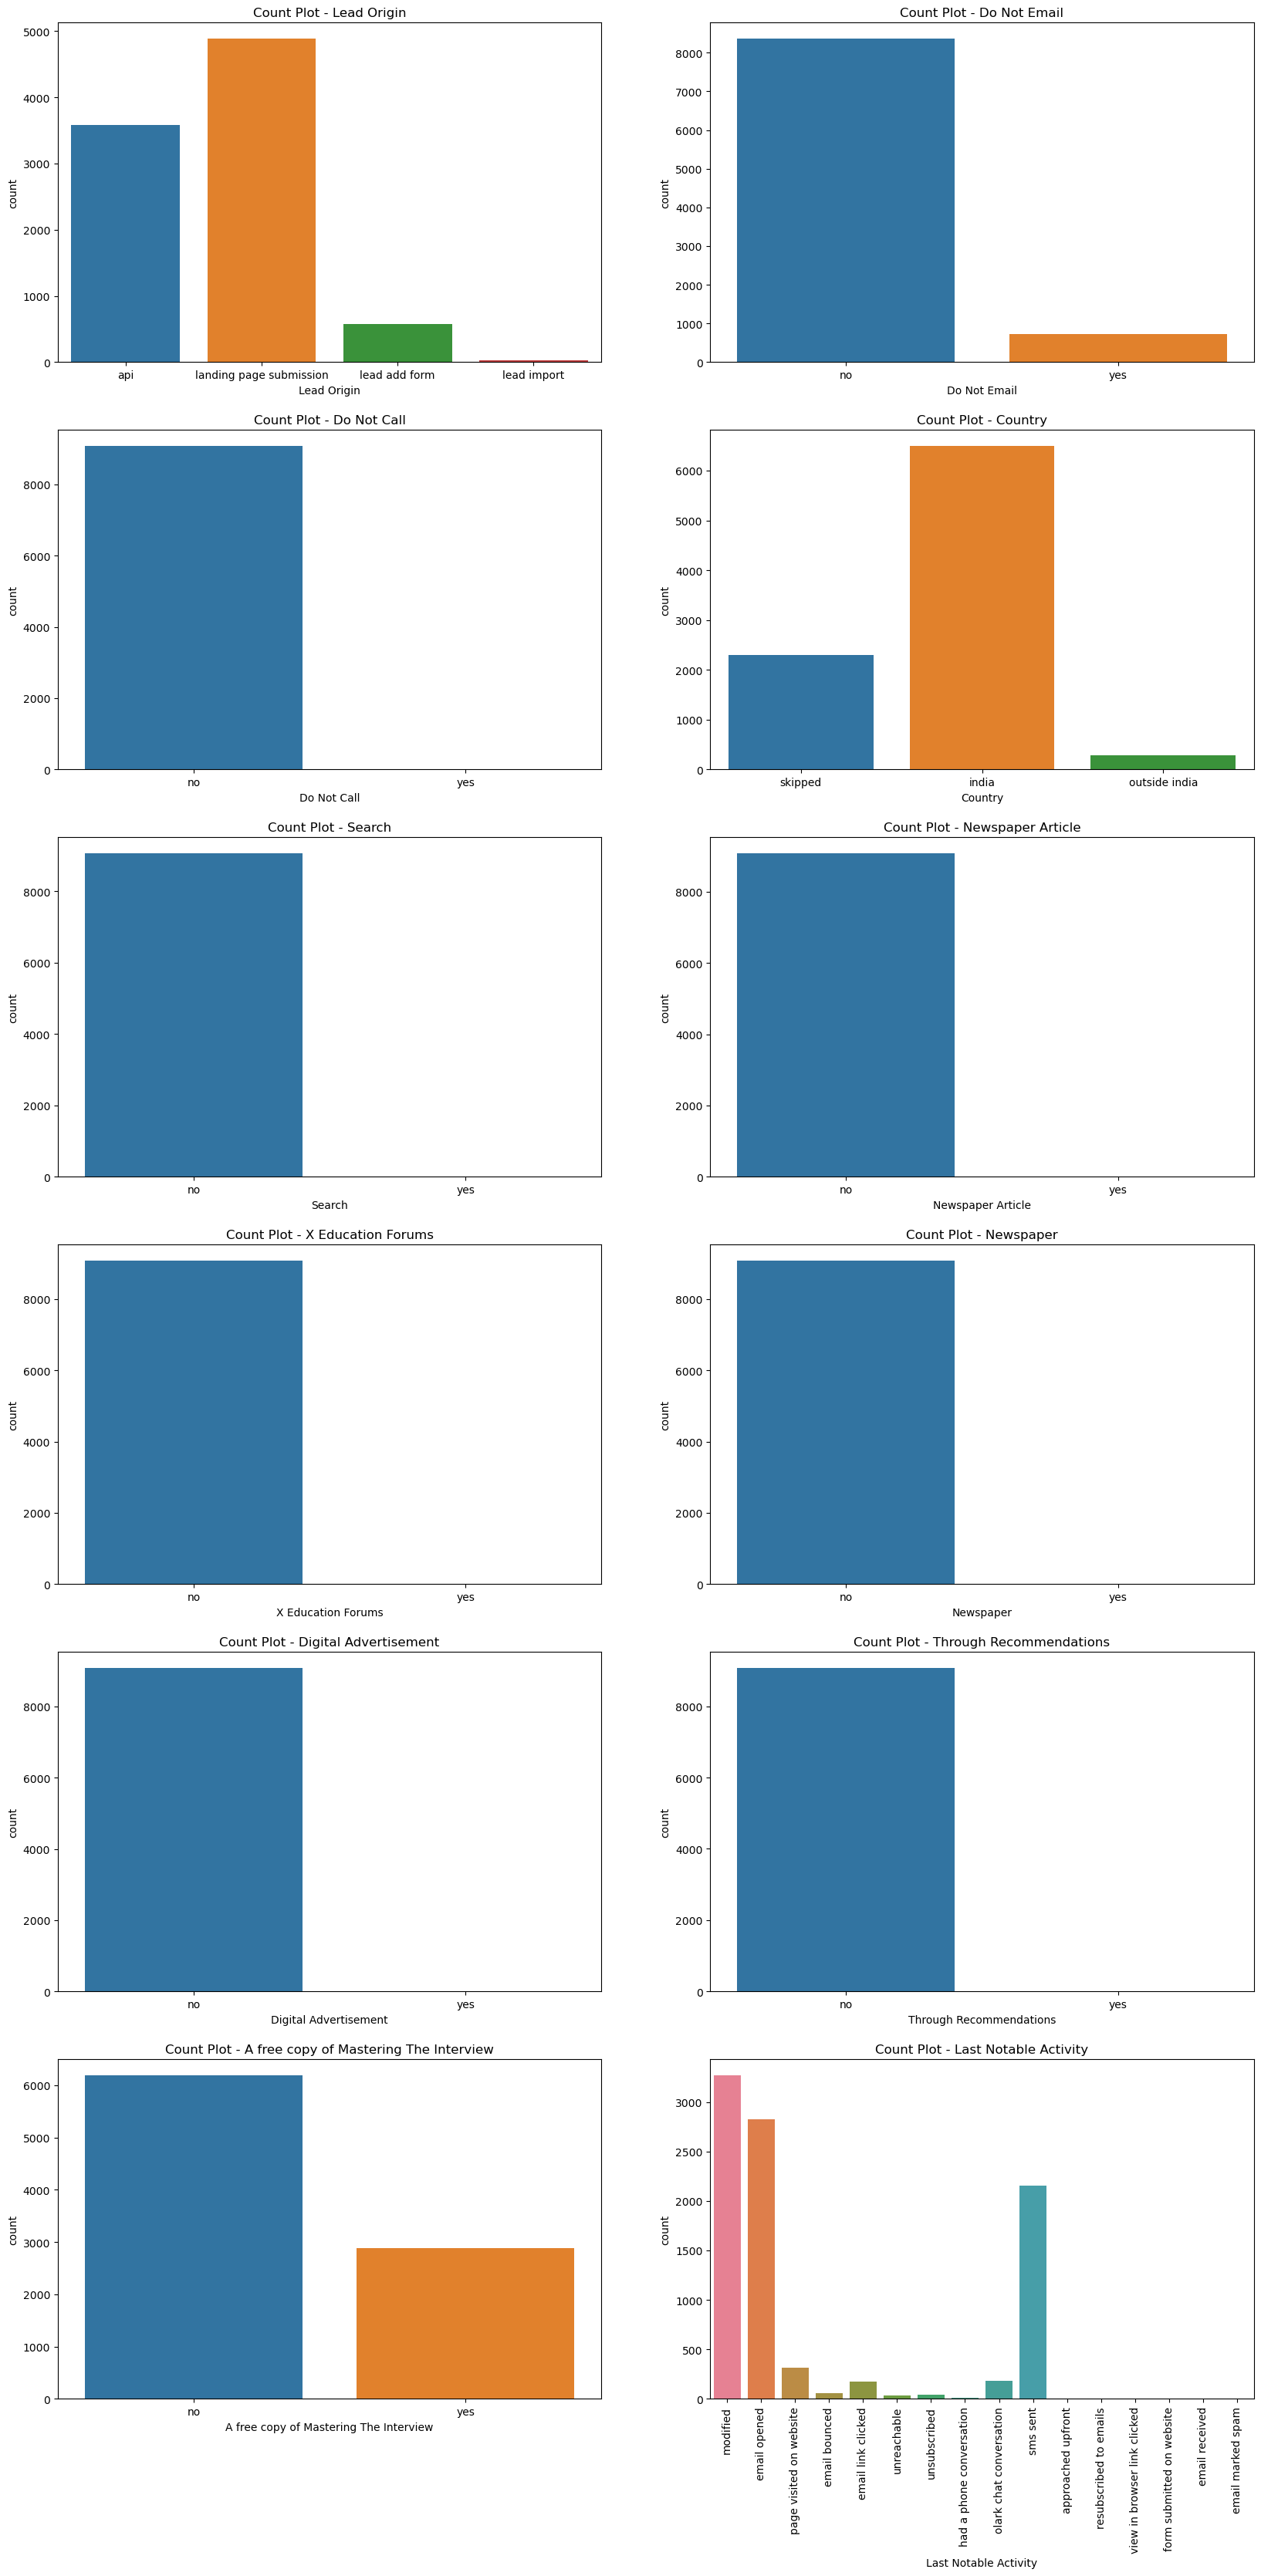

In [1997]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x = 'Lead Origin',data=lead_dataframe_final,hue ='Lead Origin')
plt.title('Count Plot - Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x = 'Do Not Email',data=lead_dataframe_final,hue ='Do Not Email')
plt.title('Count Plot - Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x = 'Do Not Call',data=lead_dataframe_final,hue ='Do Not Call')
plt.title('Count Plot - Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x = 'Country',data=lead_dataframe_final,hue ='Country')
plt.title('Count Plot - Country')

plt.subplot(6,2,5)
sns.countplot(x = 'Search',data=lead_dataframe_final,hue ='Search')
plt.title('Count Plot - Search')

plt.subplot(6,2,6)
sns.countplot(x = 'Newspaper Article',data=lead_dataframe_final,hue ='Newspaper Article')
plt.title('Count Plot - Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(x = 'X Education Forums',data=lead_dataframe_final,hue ='X Education Forums')
plt.title('Count Plot - X Education Forums')

plt.subplot(6,2,8)
sns.countplot(x = 'Newspaper',data=lead_dataframe_final,hue ='Newspaper')
plt.title('Count Plot - Newspaper')

plt.subplot(6,2,9)
sns.countplot(x = 'Digital Advertisement',data=lead_dataframe_final,hue ='Digital Advertisement')
plt.title('Count Plot - Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(x = 'Through Recommendations',data=lead_dataframe_final,hue ='Through Recommendations')
plt.title('Count Plot - Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(x = 'A free copy of Mastering The Interview',data=lead_dataframe_final,hue ='A free copy of Mastering The Interview')
plt.title('Count Plot - A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(x = 'Last Notable Activity',data=lead_dataframe_final,hue ='Last Notable Activity').tick_params(axis='x', rotation = 90)
#sns.countplot(data= lead_dataframe_final['Last Notable Activity'],palette='Set1').tick_params(axis='x', rotation = 0)
plt.title('Count Plot - Last Notable Activity')
plt.show()

Text(0.5, 1.0, 'Count Plot - Converted')

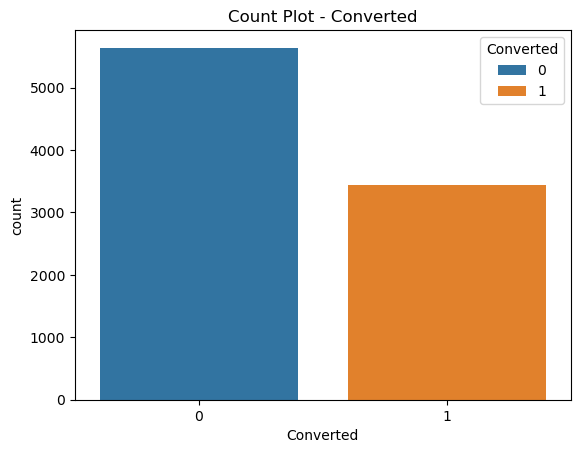

In [1998]:
sns.countplot(x = 'Converted',data=lead_dataframe_final,hue ='Converted')
plt.title('Count Plot - Converted')

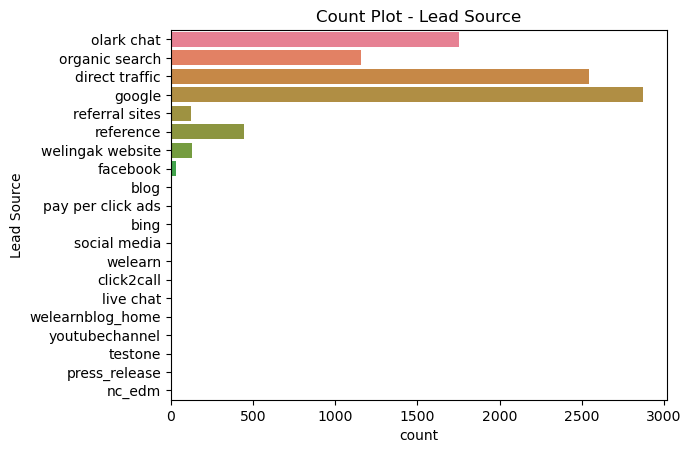

In [1999]:
sns.countplot(data = lead_dataframe_final,y = 'Lead Source',hue='Lead Source')
plt.title('Count Plot - Lead Source')
plt.show()

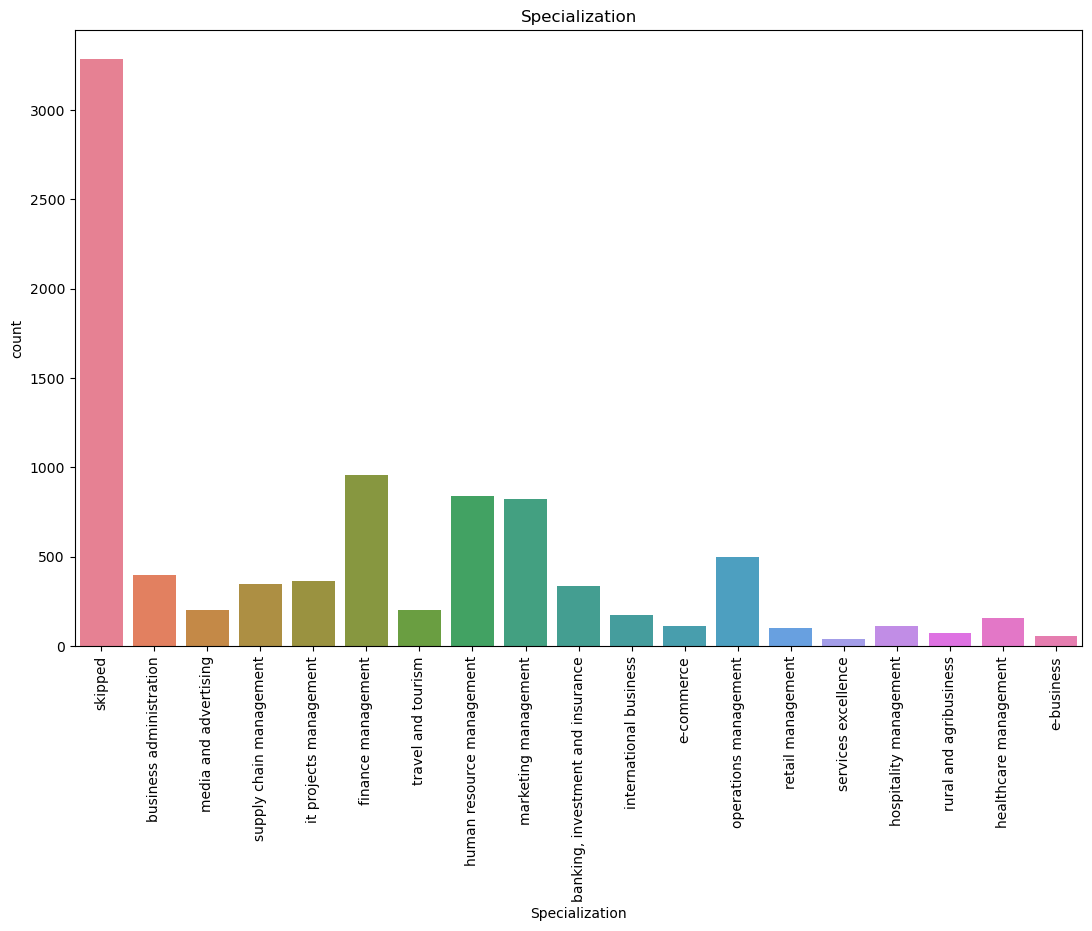

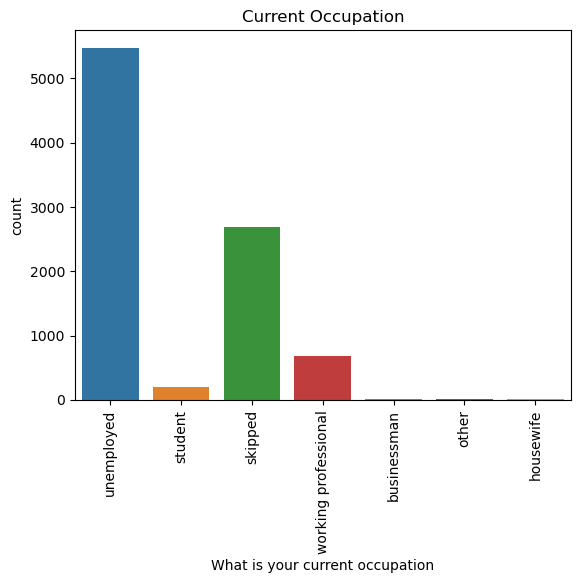

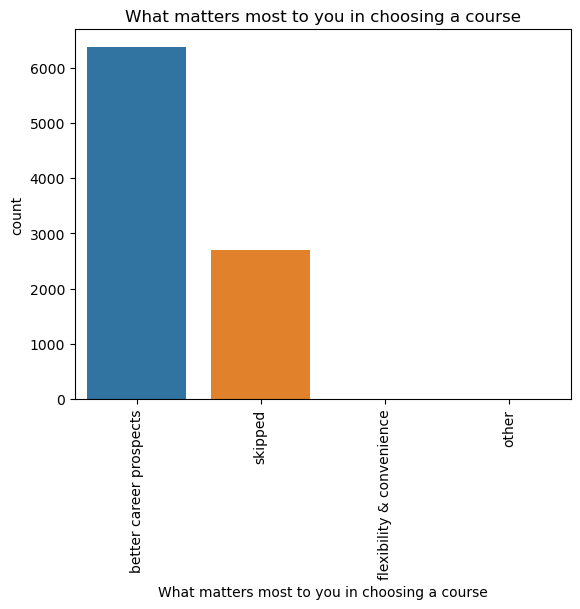

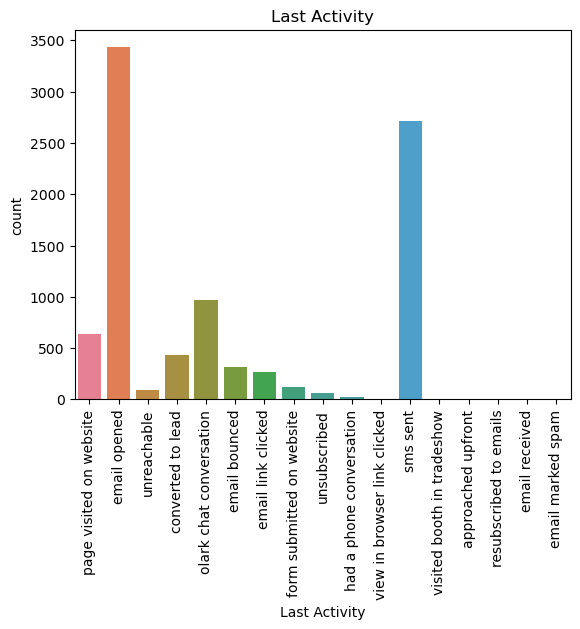

In [2000]:
plt.figure(figsize = (13,8))

sns.countplot(data = lead_dataframe_final,x = 'Specialization',hue='Specialization').tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

sns.countplot(data = lead_dataframe_final,x='What is your current occupation',hue ='What is your current occupation').tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.show()

sns.countplot(data = lead_dataframe_final, x = 'What matters most to you in choosing a course',hue = 'What matters most to you in choosing a course').tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

sns.countplot(data = lead_dataframe_final, x = 'Last Activity', hue = 'Last Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

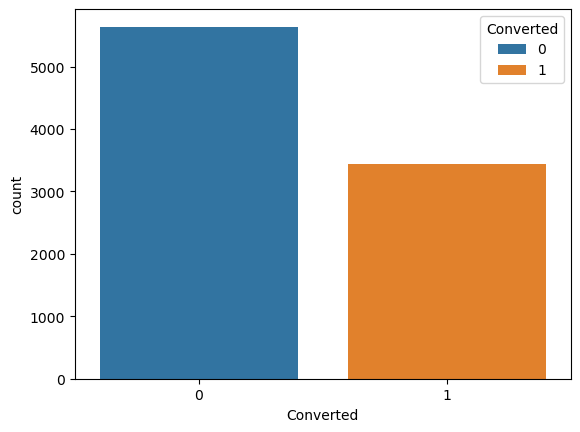

In [2001]:
# target Variable Converted
sns.countplot(data = lead_dataframe_final, x= 'Converted',hue = 'Converted')
plt.show()

## <sup>2.1.2 Numerical Variables

In [2002]:
lead_dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

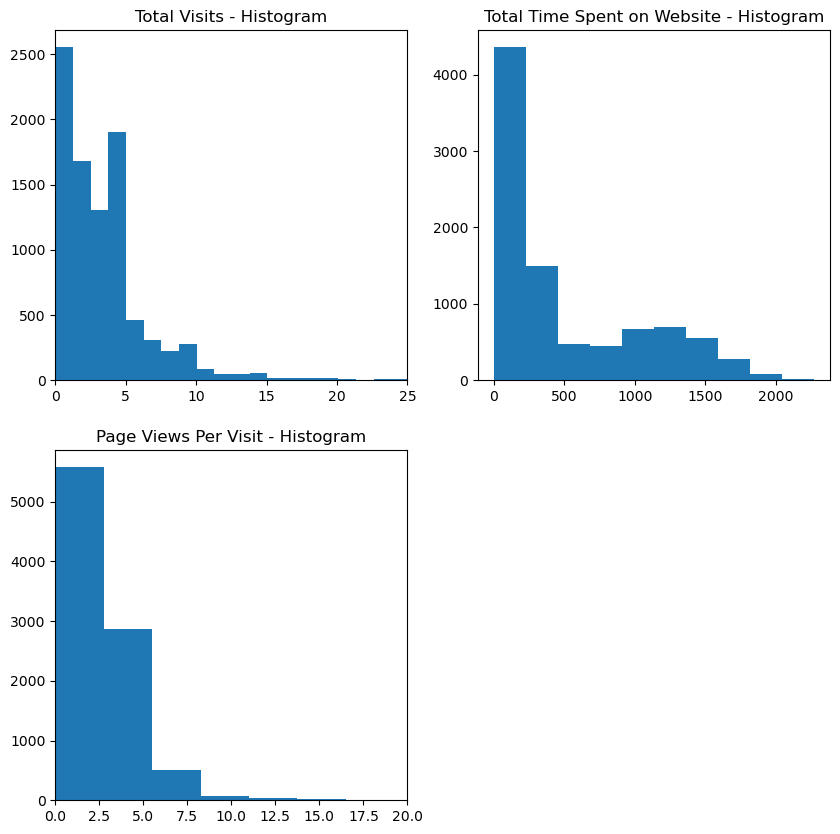

In [2003]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_dataframe_final['TotalVisits'], bins = 200)
plt.title('Total Visits - Histogram')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_dataframe_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website - Histogram')

plt.subplot(223)
plt.hist(lead_dataframe_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit - Histogram')
plt.xlim(0,20)
plt.show()

<sup>2.1.3 Analyzing all categorical varibales w.r.t 'Converted' (target variable)

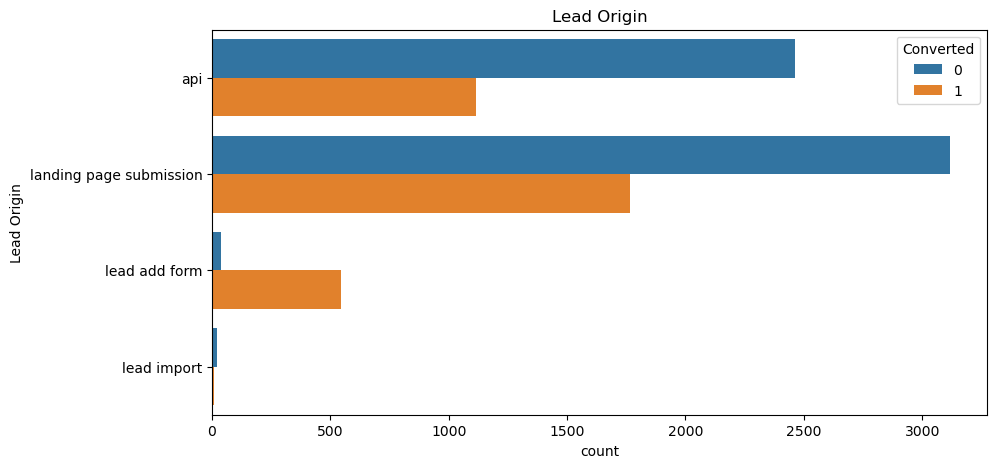

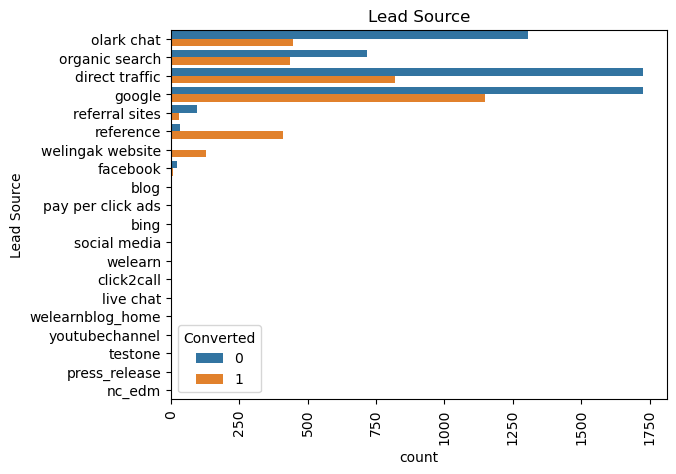

In [2004]:
plt.figure(figsize = (10,5))


sns.countplot(y='Lead Origin', hue='Converted', data= lead_dataframe_final)
plt.title('Lead Origin')
plt.show()

sns.countplot(y='Lead Source', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

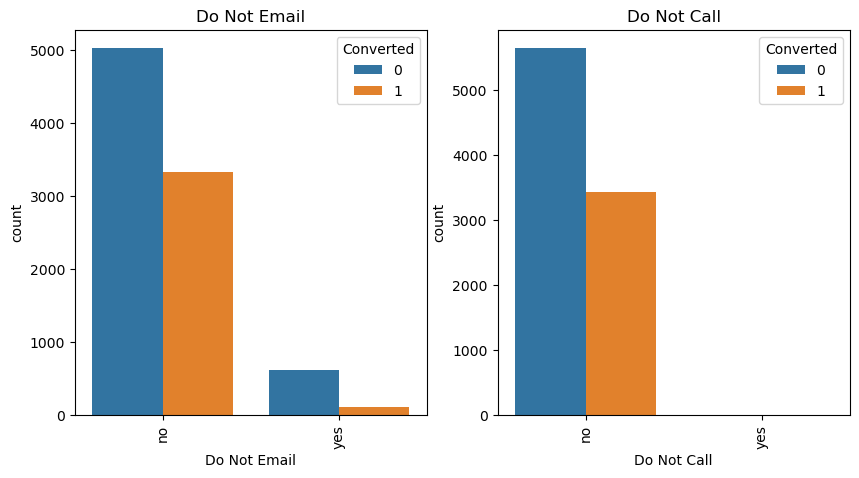

In [2005]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

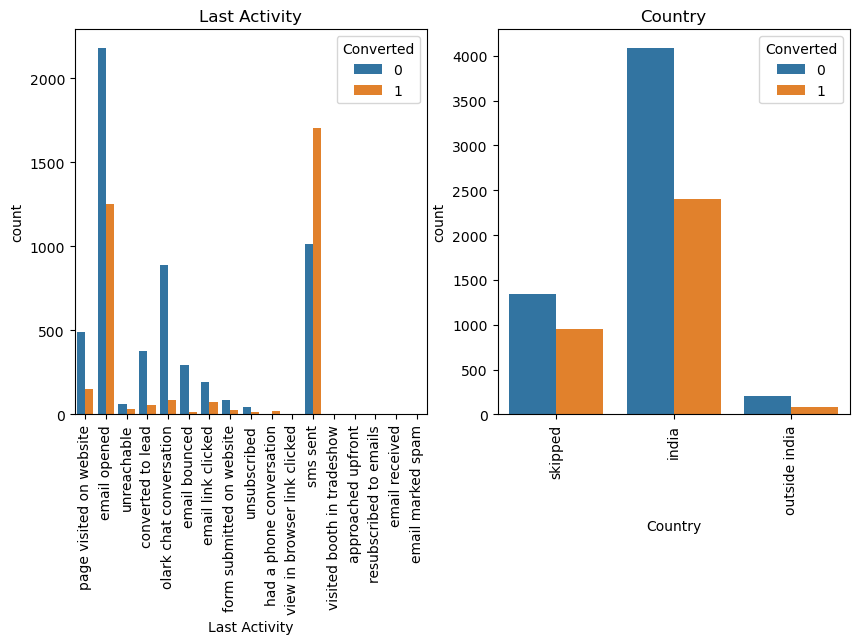

In [2006]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

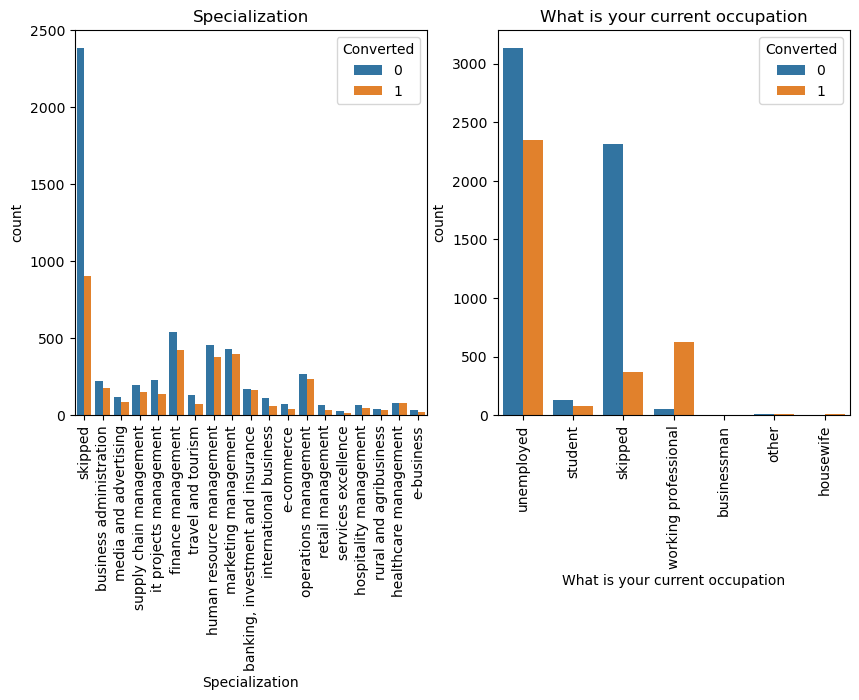

In [2007]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

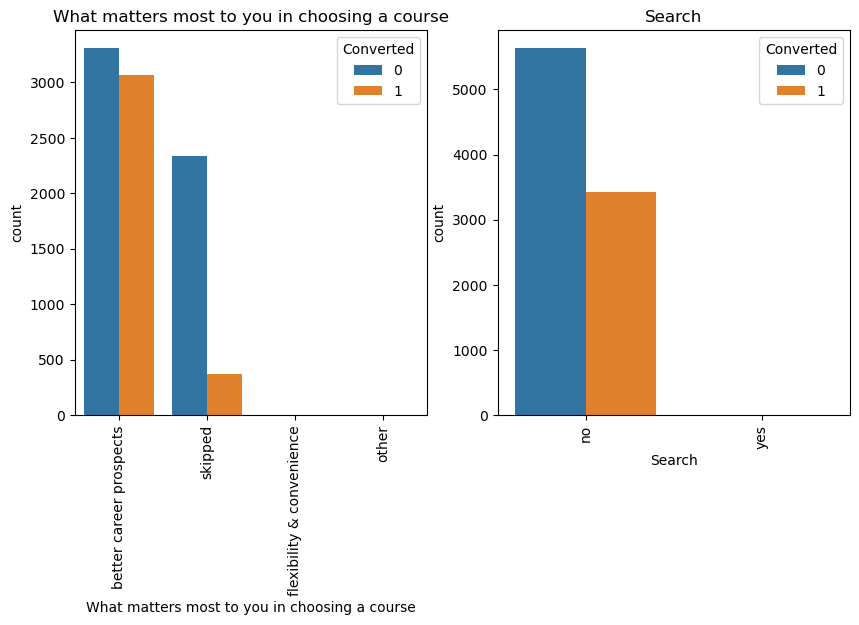

In [2008]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

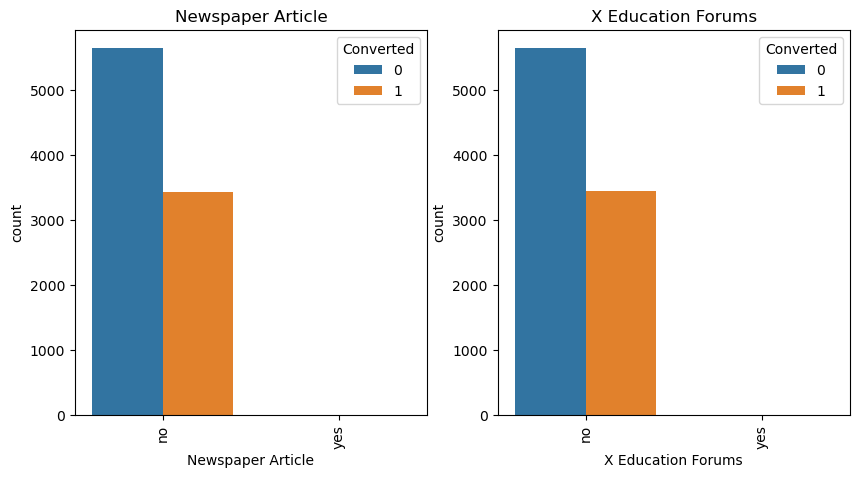

In [2009]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

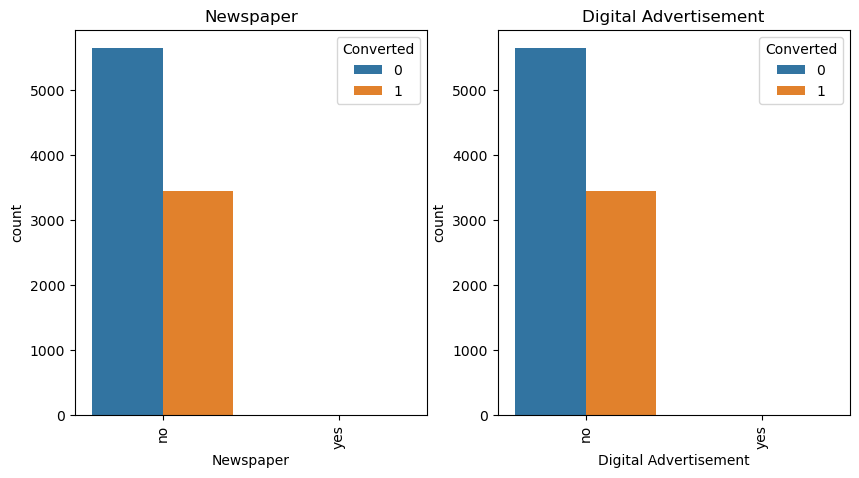

In [2010]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

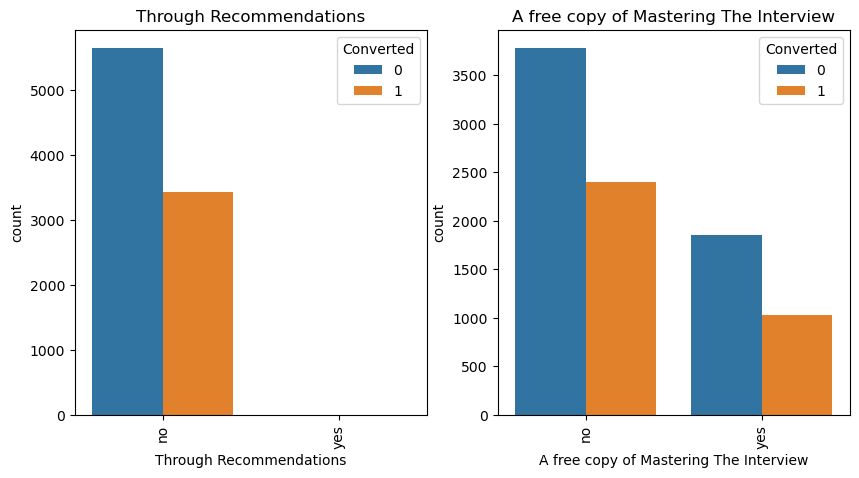

In [2011]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

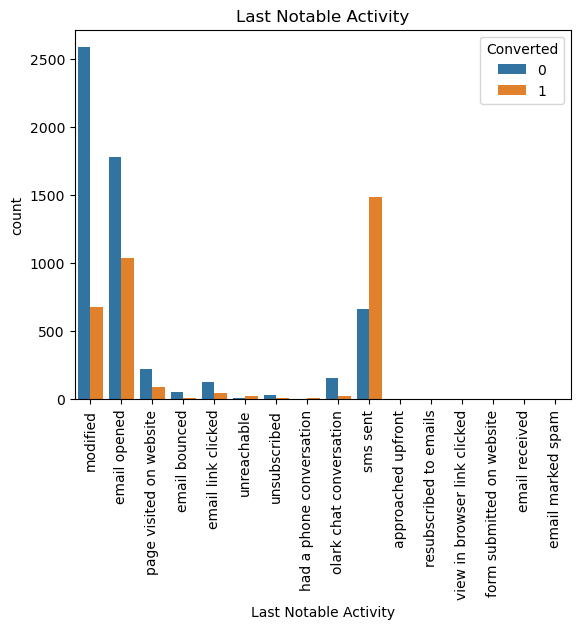

In [2012]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_dataframe_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

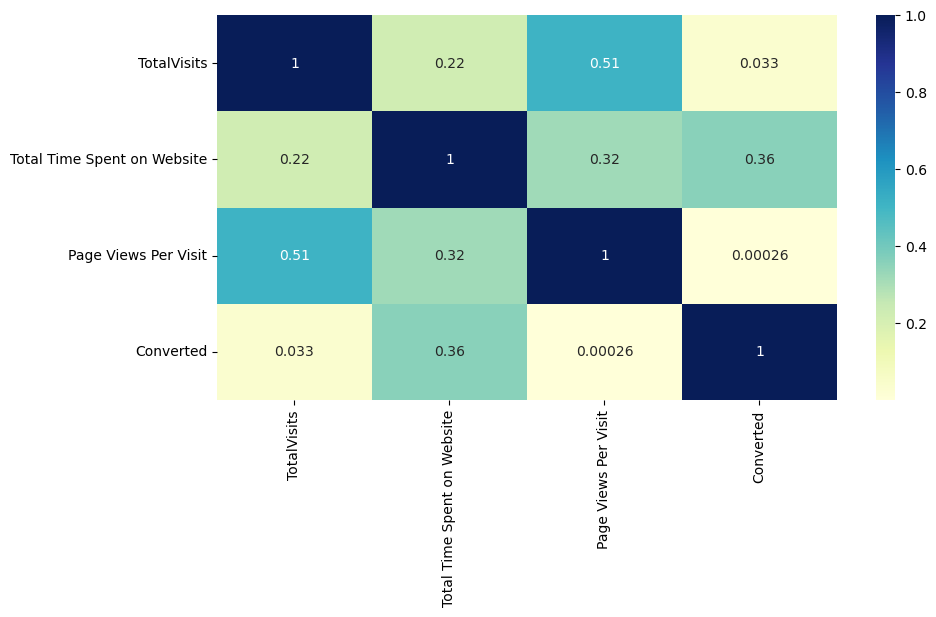

In [2013]:
# Correlation and heatma amongst variables - ['TotalVisits','Total Time Spent on Website','Page Views Per Visit', 'Converted']
plt.figure(figsize=(10,5))
sns.heatmap(lead_dataframe_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit', 'Converted']].corr(),annot=True,cmap='YlGnBu')
plt.show()

<p style="color: green"> <b> <i> EDA reveals that there are many elements which have very little correlation hence having less relevance to our analysis.

In [2014]:
# checking outliers of the numerical fields

numeric = lead_dataframe_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

<p style="color: green"> <b> <i> Major outliers are not present for the columns

#### <i> Step 3 : Dummy features 

In [2015]:
lead_dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [2016]:
lead_dataframe_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2017]:
# Create dummy variables
dummy = pd.get_dummies(lead_dataframe_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([lead_dataframe_final, dummy], axis=1)
df_final_dum

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         api      olark chat           no          no   
1                         api  organic search           no          no   
2     landing page submission  direct traffic           no          no   
3     landing page submission  direct traffic           no          no   
4     landing page submission          google           no          no   
...                       ...             ...          ...         ...   
9235  landing page submission  direct traffic          yes          no   
9236  landing page submission  direct traffic           no          no   
9237  landing page submission  direct traffic          yes          no   
9238  landing page submission          google           no          no   
9239  landing page submission  direct traffic           no          no   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  ...  \
0                     0.00  page visited on website        skipped  ...   
1                     2.50             email opened          india  ...   
2                     2.00             email opened          india  ...   
3                     1.00              unreachable          india  ...   
4                     1.00        converted to lead          india  ...   
...                    ...                      ...            ...  ...   
9235                  2.67        email marked spam  outside india  ...   
9236                  2.00                 sms sent          india  ...   
9237                  2.00                 sms sent          india  ...   
9238                  3.00                 sms sent          india  ...   
9239                  3.00                 sms sent  outside india  ...   

     Last Notable Activity_form submitted on website  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
9235                                           False   
9236                                           False   
9237                                           False   
9238                                           False   
9239                                           False   

     Last Notable Activity_had a phone conversation  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
9235                                          False   
9236                                          False   
9237                                          False   
9238                                          False   
9239                                          False   

     Last Notable Activity_modified  \
0                              True   
1                             False   
2                             False   
3    

In [2018]:
df_final_dum = df_final_dum.drop(['What is your current occupation_skipped','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_skipped','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)
df_final_dum

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_landing page submission  \
0                     0.00                                False   
1                     2.50                                False   
2                     2.00                                 True   
3                     1.00                                 True   
4                     1.00                                 True   
...                    ...                                  ...   
9235                  2.67                                 True   
9236                  2.00                                 True   
9237                  2.00                                 True   
9238                  3.00                                 True   
9239                  3.00                                 True   

      Lead Origin_lead add form  Lead Origin_lead import  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                         False                    False   
4                         False                    False   
...                         ...                      ...   
9235                      False                    False   
9236                      False                    False   
9237                      False                    False   
9238                      False                    False   
9239                      False                    False   

      Specialization_business administration  Specialization_e-business  \
0                                      False                      False   
1                                      False                      False   
2                                       True                      False   
3                                      False                      False   
4                                      False                      False   
...                                      ...                        ...   
9235                                   False                      False   
9236                                   False                      False   
9237                                    True                      False   
9238                                   False                      False   
9239                                   False                      False   

      Specialization_e-commerce  ...  \
0                         False  ...   
1                         False  ...   
2                         False  ...   
3                         False  ...   
4                         False  ...   
...                         ...  ...   
9235                      False  ...   
9236                      False  ...   
9237                      False  ...   
9238                      False  ...   
9239                      False  ...   

      Last Notable Activity_form submitted on website  \
0                                               False   
1                                               False   
2                                               False   
3                                               False   
4                                               False   
...                    

#### <i> Step 4 : Train-Test Split 

In [2019]:
# Import the required library
from sklearn.model_selection import train_test_split

In [2020]:
# check the data types of out final dataframe
df_final_dum.dtypes

Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
Page Views Per Visit                                  float64
Lead Origin_landing page submission                      bool
                                                       ...   
Last Notable Activity_resubscribed to emails             bool
Last Notable Activity_sms sent                           bool
Last Notable Activity_unreachable                        bool
Last Notable Activity_unsubscribed                       bool
Last Notable Activity_view in browser link clicked       bool
Length: 81, dtype: object

In [2021]:
for col in df_final_dum.columns:
    if df_final_dum[col].dtype == bool:
        df_final_dum[col] = df_final_dum[col].astype('int64')

In [2022]:
# check if the data types have been converted successfully
df_final_dum.dtypes

Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
Page Views Per Visit                                  float64
Lead Origin_landing page submission                     int64
                                                       ...   
Last Notable Activity_resubscribed to emails            int64
Last Notable Activity_sms sent                          int64
Last Notable Activity_unreachable                       int64
Last Notable Activity_unsubscribed                      int64
Last Notable Activity_view in browser link clicked      int64
Length: 81, dtype: object

In [2023]:
X = df_final_dum.drop(['Converted'], axis = 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Specialization_business administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_e-business  Specialization_e-commerce  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_finance management  ...  \
0                                  0  ...   
1                                  0  ...   
2                                  0  ...   
3                                  0  ...   
4                                  0  ...   

   Last Notable Activity_form submitted on website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_had a phone conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_olark chat conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_page visited on website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0     

In [2024]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2025]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [2026]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [2027]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1289     0.014184                     0.612676              0.083333   
3604     0.000000                     0.000000              0.000000   
5584     0.042553                     0.751761              0.250000   
7679     0.000000                     0.000000              0.000000   
7563     0.014184                     0.787852              0.083333   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
1289                                    1                          0   
3604                                    0                          0   
5584                                    1                          0   
7679                                    0                          0   
7563                                    1                          0   

      Lead Origin_lead import  Specialization_business administration  \
1289                        0                                       0   
3604                        0                                       0   
5584                        0                                       0   
7679                        0                                       0   
7563                        0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
1289                          0                          0   
3604                          0                          0   
5584                          0                          0   
7679                          0                          0   
7563                          0                          0   

      Specialization_finance management  ...  \
1289                                  1  ...   
3604                                  0  ...   
5584                                  0  ...   
7679                                  0  ...   
7563                                  0  ...   

      Last Notable Activity_form submitted on website  \
1289                                                0   
3604                                                0   
5584                                                0   
7679                                                0   
7563                                                0   

      Last Notable Activity_had a phone conversation  \
1289                                               0   
3604                                               0   
5584                                               0   
7679                                               0   
7563                                               0   

      Last Notable Activity_modified  \
1289                               0   
3604                               0   
5584                               0   
7679                               0   
7563                               1   

      Last Notable Activity_olark chat conversation  \
1289                                              0   
3604                                              0   
5584                                              0   
7679                                              0   
7563                                              0   

      Last Notable Activity_page visited on website  \
1289                                              0   
3604                                              1   
5584                                              0   
7679                                              0   
7563                                              0   

      Last Notable Activity_resubscribed to emails  \
1289                                             0   
3604                                             0   
5584                                             0   
7679                                             0   
7563                                             0   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
1289                               0                    

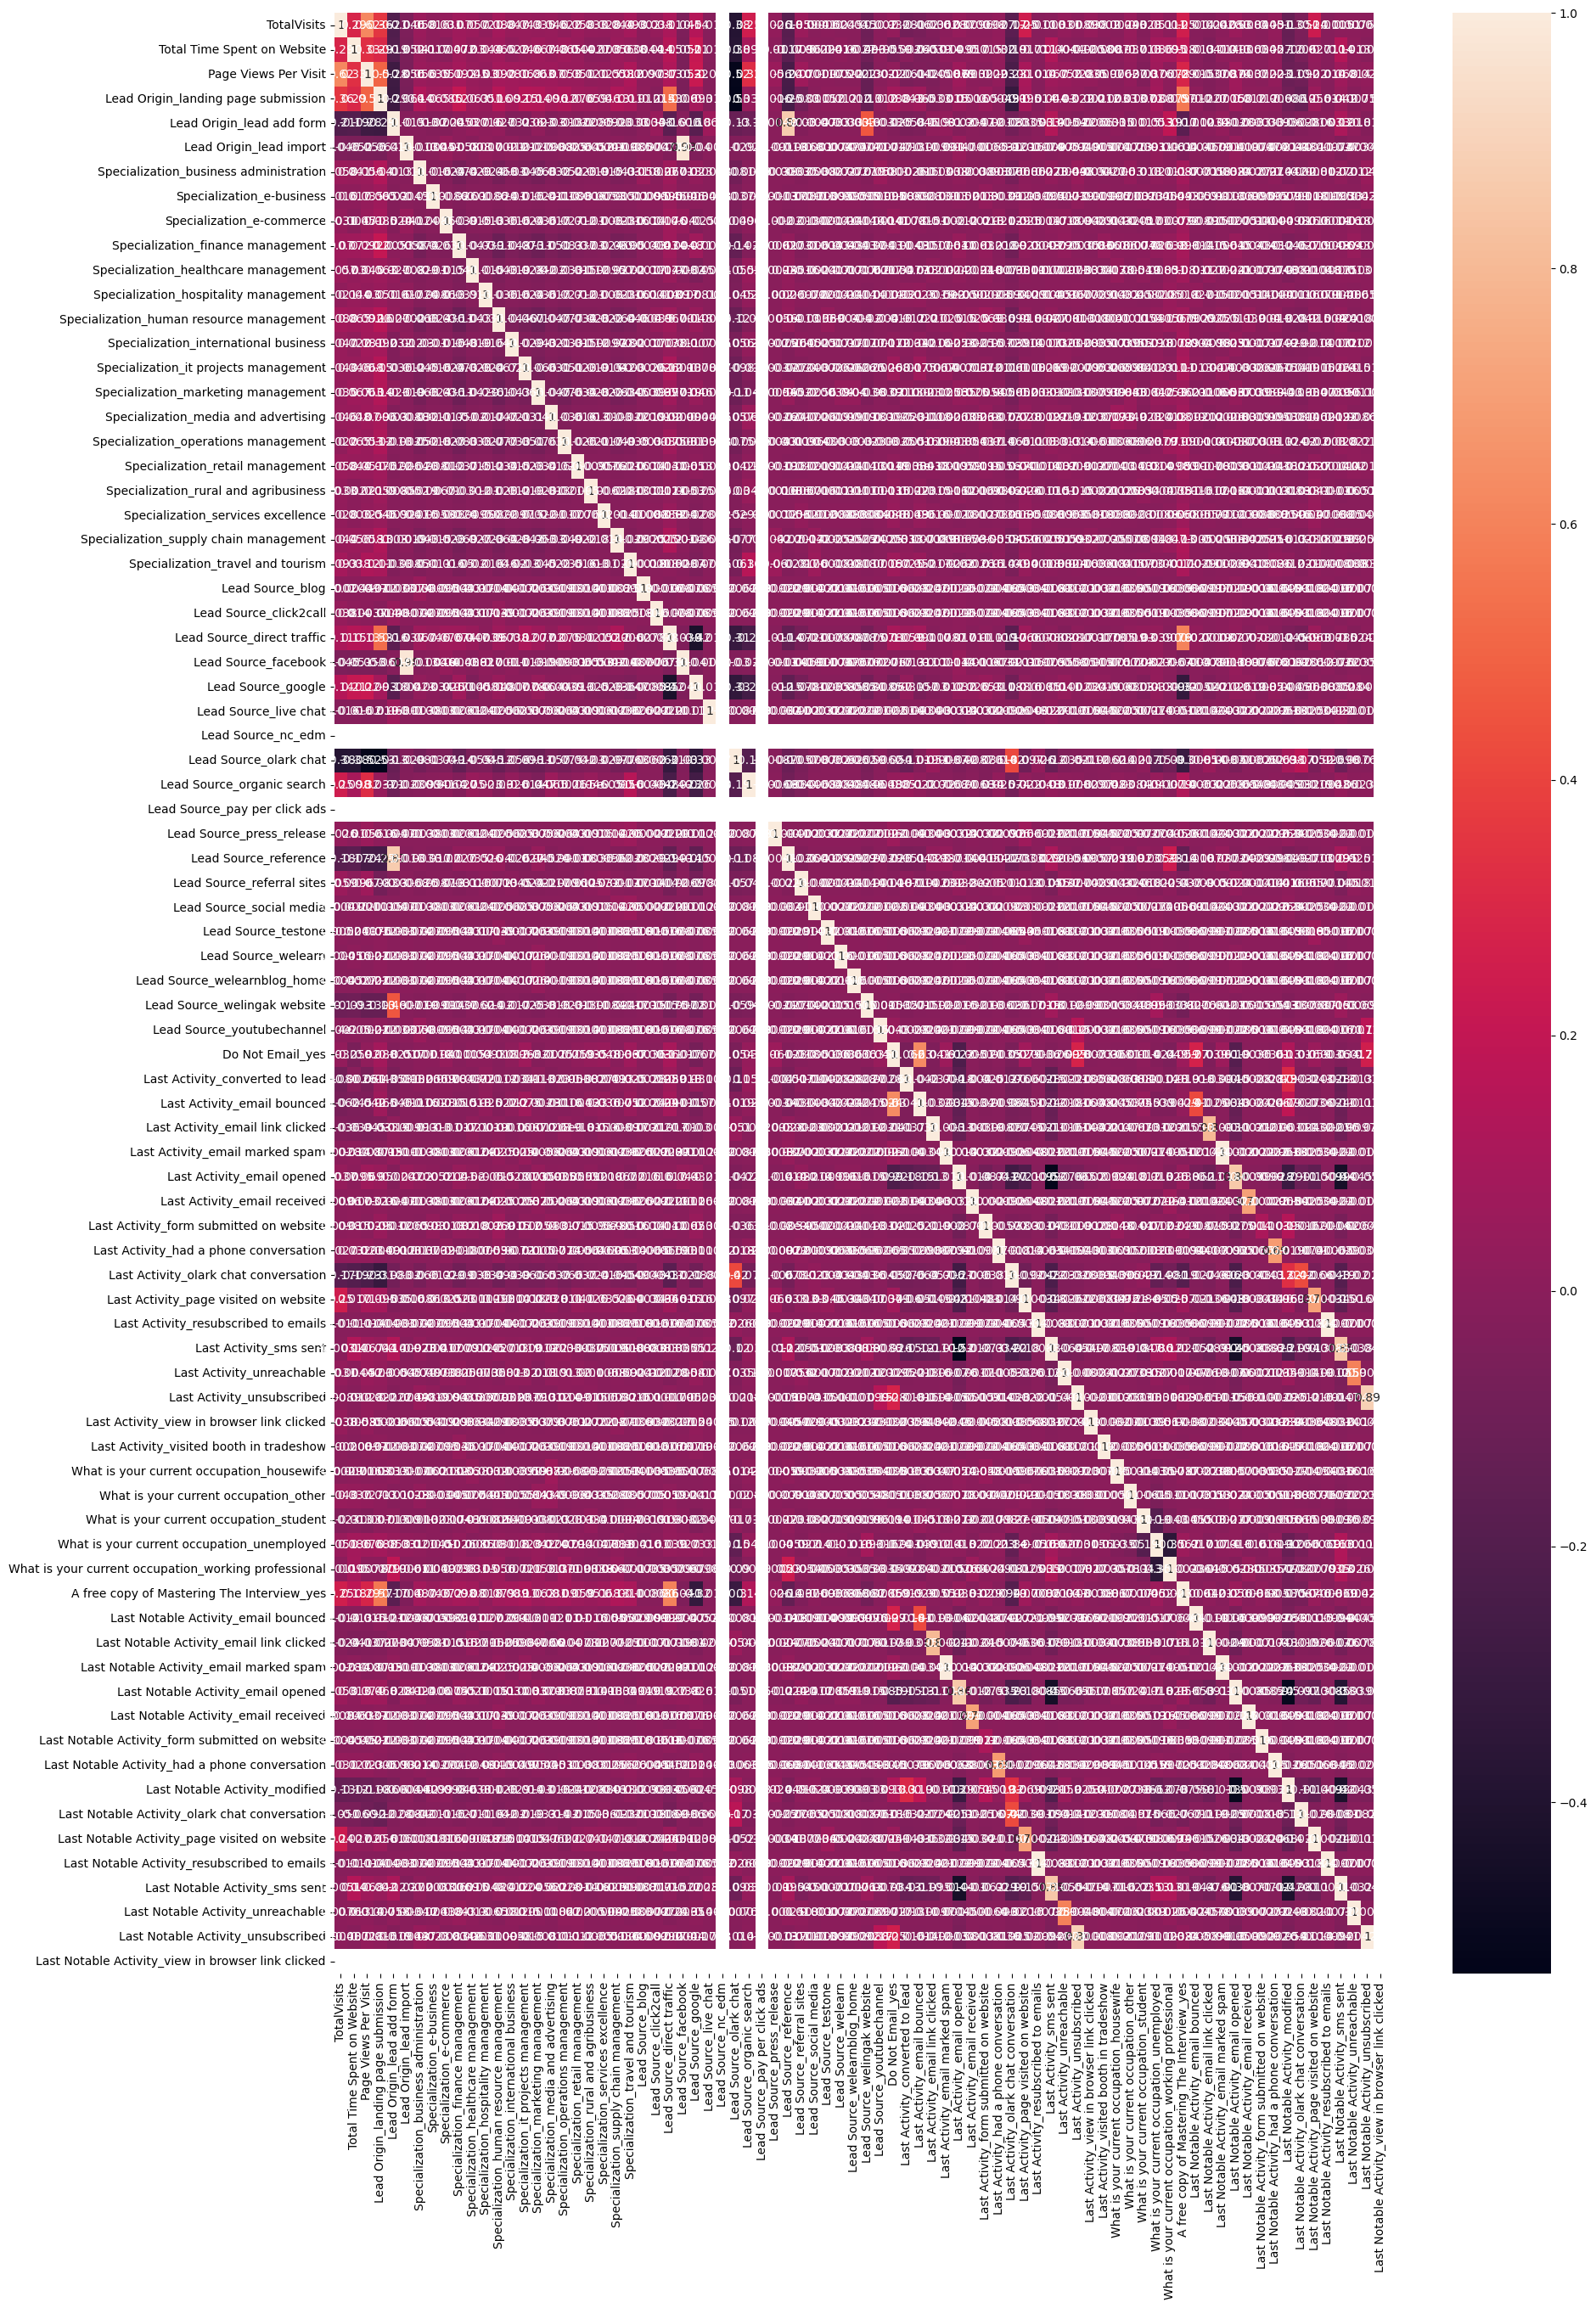

In [2028]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

<p style="color: green"> <b> <i> We will drop tables once we are done with RFP

#### <i> Step 5 : Building Model

In [2029]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [2030]:
log_regression = LogisticRegression()

In [2031]:
# Running RFE with 15 variables as output
rfe = RFE(log_regression, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [2032]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_landing page submission', False, 25),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 32),
 ('Specialization_e-business', False, 31),
 ('Specialization_e-commerce', False, 22),
 ('Specialization_finance management', False, 29),
 ('Specialization_healthcare management', False, 24),
 ('Specialization_hospitality management', False, 40),
 ('Specialization_human resource management', False, 30),
 ('Specialization_international business', False, 36),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 21),
 ('Specialization_media and advertising', False, 41),
 ('Specialization_operations management', False, 26),
 ('Specialization_retail management', False, 62),
 ('Specialization_rural and agribusiness', False, 23),
 ('Specialization_serv

In [2033]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
print(col)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')


<p style="color: green"> <b> <i> All the variables selected by RFE, next statistics part (p-values and the VIFs).

In [2034]:
# Selecting columns selected by RFE
X_train = X_train[col]
X_train.dtypes

TotalVisits                                             float64
Total Time Spent on Website                             float64
Lead Origin_lead add form                                 int64
Lead Source_direct traffic                                int64
Lead Source_google                                        int64
Lead Source_organic search                                int64
Lead Source_welingak website                              int64
Do Not Email_yes                                          int64
Last Activity_olark chat conversation                     int64
Last Activity_sms sent                                    int64
What is your current occupation_housewife                 int64
What is your current occupation_other                     int64
What is your current occupation_working professional      int64
Last Notable Activity_had a phone conversation            int64
Last Notable Activity_unreachable                         int64
dtype: object

<p style="color: blue"> <b> <i> Model 1

In [2035]:
import statsmodels.api as sm

In [2036]:
X_train_sm = sm.add_constant(X_train)
model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = model1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Mon, 16 Sep 2024   Deviance:                       5482.6
Time:                        01:57:10   Pearson chi2:                 6.64e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [2037]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2038]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
1                         Total Time Spent on Website  2.34
0                                         TotalVisits  2.28
4                                  Lead Source_google  2.04
3                          Lead Source_direct traffic  1.91
5                          Lead Source_organic search  1.60
9                              Last Activity_sms sent  1.49
2                           Lead Origin_lead add form  1.47
6                        Lead Source_welingak website  1.31
12  What is your current occupation_working profes...  1.17
7                                    Do Not Email_yes  1.10
8               Last Activity_olark chat conversation  1.02
11              What is your current occupation_other  1.01
14                  Last Notable Activity_unreachable  1.01
10          What is your current occupation_housewife  1.00
13     Last Notable Activity_had a phone conversation  1.00


<p style="color: green"> <b> <i> The VIF values seem fine but the p-values aren not. So, dropping 'Last Notable Activity had a phone conversation

<p style="color: blue"> <b> <i> Model 2

In [2039]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [2040]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.9
Date:                Mon, 16 Sep 2024   Deviance:                       5499.7
Time:                        01:57:10   Pearson chi2:                 6.64e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3741
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2492      0.081    -15.422      0.000      -1.408      -1.090
TotalVisits                                              4.7231      1.410      3.349      0.001       1.959       7.488
Total Time Spent on Website                              4.5511      0.162     28.089      0.000       4.234       4.869
Lead Origin_lead add form                                2.6773      0.225     11.918      0.000       2.237       3.118
Lead Source_direct traffic                              -1.4795      0.114    -12.987      0.000      -1.703      -1.256
Lead Source_google                                      -1.1600      0.109    -10.611      0.000      -1.374      -0.946
Lead Source_organic search                              -1.2778      0.134     -9.510      0.000      -1.541      -1.014
Lead Source_welingak website                             2.5990      1.033      2.515      0.012       0.574       4.624
Do Not Email_yes                                        -1.4113      0.168     -8.413      0.000      -1.740      -1.083
Last Activity_olark chat conversation                   -1.4730      0.165     -8.908      0.000      -1.797      -1.149
Last Activity_sms sent                                   1.3132      0.072     18.136      0.000       1.171       1.455
What is your current occupation_housewife               22.4667   1.13e+04      0.002      0.998   -2.21e+04    2.21e+04
What is your current occupation_other                    1.4049      0.760      1.848      0.065      -0.085       2.895
What is your current occupation_working professional     2.8013      0.193     14.487      0.000       2.422       3.180
Last Notable Activity_unreachable                        1.6925      0.610      2.774      0.006       0.497       2.888
========================================================================================================================
"""

In [2041]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         Total Time Spent on Website  2.34
0                                         TotalVisits  2.28
4                                  Lead Source_google  2.04
3                          Lead Source_direct traffic  1.91
5                          Lead Source_organic search  1.60
9                              Last Activity_sms sent  1.49
2                           Lead Origin_lead add form  1.47
6                        Lead Source_welingak website  1.31
12  What is your current occupation_working profes...  1.17
7                                    Do Not Email_yes  1.10
8               Last Activity_olark chat conversation  1.02
11              What is your current occupation_other  1.01
13                  Last Notable Activity_unreachable  1.01
10          What is your current occupation_housewife  1.00

<p style="color: green"> <b> <i> The VIF values seem fine but the p-values aren not. So, dropping 'What is your current occupation housewife'

<p style="color: blue"> <b> <i> Model 3

In [2042]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [2043]:
X_train_sm = sm.add_constant(X_train)
model3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.4
Date:                Mon, 16 Sep 2024   Deviance:                       5510.8
Time:                        01:57:11   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2461      0.081    -15.396      0.000      -1.405      -1.087
TotalVisits                                              4.6490      1.403      3.314      0.001       1.899       7.399
Total Time Spent on Website                              4.5480      0.162     28.098      0.000       4.231       4.865
Lead Origin_lead add form                                2.6841      0.224     11.957      0.000       2.244       3.124
Lead Source_direct traffic                              -1.4736      0.114    -12.954      0.000      -1.697      -1.251
Lead Source_google                                      -1.1551      0.109    -10.580      0.000      -1.369      -0.941
Lead Source_organic search                              -1.2633      0.134     -9.426      0.000      -1.526      -1.001
Lead Source_welingak website                             2.5921      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4146      0.168     -8.437      0.000      -1.743      -1.086
Last Activity_olark chat conversation                   -1.4765      0.165     -8.932      0.000      -1.800      -1.152
Last Activity_sms sent                                   1.3072      0.072     18.070      0.000       1.165       1.449
What is your current occupation_other                    1.4003      0.760      1.842      0.066      -0.090       2.890
What is your current occupation_working professional     2.7968      0.193     14.467      0.000       2.418       3.176
Last Notable Activity_unreachable                        1.6871      0.610      2.766      0.006       0.492       2.883
========================================================================================================================
"""

In [2044]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         Total Time Spent on Website  2.34
0                                         TotalVisits  2.28
4                                  Lead Source_google  2.04
3                          Lead Source_direct traffic  1.91
5                          Lead Source_organic search  1.60
9                              Last Activity_sms sent  1.49
2                           Lead Origin_lead add form  1.47
6                        Lead Source_welingak website  1.31
11  What is your current occupation_working profes...  1.17
7                                    Do Not Email_yes  1.10
8               Last Activity_olark chat conversation  1.02
10              What is your current occupation_other  1.01
12                  Last Notable Activity_unreachable  1.01

<p style="color: green"> <b> <i> The VIF values seem fine but the p-values aren not. So, dropping 'What is your current occupation other'

<p style="color: blue"> <b> <i> Model 4

In [2045]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [2046]:
X_train_sm = sm.add_constant(X_train)
model4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.3
Date:                Mon, 16 Sep 2024   Deviance:                       5514.5
Time:                        01:57:11   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3726
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2466      0.081    -15.398      0.000      -1.405      -1.088
TotalVisits                                              4.7586      1.410      3.375      0.001       1.995       7.522
Total Time Spent on Website                              4.5539      0.162     28.136      0.000       4.237       4.871
Lead Origin_lead add form                                2.6860      0.224     11.966      0.000       2.246       3.126
Lead Source_direct traffic                              -1.4706      0.114    -12.929      0.000      -1.694      -1.248
Lead Source_google                                      -1.1564      0.109    -10.588      0.000      -1.370      -0.942
Lead Source_organic search                              -1.2631      0.134     -9.416      0.000      -1.526      -1.000
Lead Source_welingak website                             2.5923      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4186      0.168     -8.461      0.000      -1.747      -1.090
Last Activity_olark chat conversation                   -1.4717      0.165     -8.909      0.000      -1.796      -1.148
Last Activity_sms sent                                   1.3038      0.072     18.031      0.000       1.162       1.445
What is your current occupation_working professional     2.7934      0.193     14.449      0.000       2.414       3.172
Last Notable Activity_unreachable                        1.6837      0.610      2.761      0.006       0.488       2.879
========================================================================================================================
"""

In [2047]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         Total Time Spent on Website  2.33
0                                         TotalVisits  2.28
4                                  Lead Source_google  2.04
3                          Lead Source_direct traffic  1.91
5                          Lead Source_organic search  1.60
9                              Last Activity_sms sent  1.49
2                           Lead Origin_lead add form  1.47
6                        Lead Source_welingak website  1.31
10  What is your current occupation_working profes...  1.17
7                                    Do Not Email_yes  1.10
8               Last Activity_olark chat conversation  1.02
11                  Last Notable Activity_unreachable  1.01

<p style="color: green"> <b> <i> Now, in our 4th model the p value of all features are well below of 0.05. Hence, we are going with the same for Prediction

#### <i> Step 6 : Model prediction

In [2048]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.611739
3604    0.223294
5584    0.425011
7679    0.223294
7563    0.432202
7978    0.732762
7780    0.130274
7863    0.982565
838     0.779231
708     0.132990
dtype: float64

In [2049]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61173868, 0.22329356, 0.42501069, 0.22329356, 0.43220183,
       0.73276232, 0.13027447, 0.9825646 , 0.77923117, 0.13298976])

In [2050]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          1         0.611739
1          0         0.223294
2          0         0.425011
3          0         0.223294
4          0         0.432202

In [2051]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          1         0.611739          1
1          0         0.223294          0
2          0         0.425011          0
3          0         0.223294          0
4          0         0.432202          0

#### <i> Step 7 : Model Evaluation

In [2052]:
from sklearn import metrics

In [2053]:
# builing confusion matrix 
confusion_mat= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_mat

array([[3403,  492],
       [ 729, 1727]], dtype=int64)

In [2054]:
# Accuracy check
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.807746811525744

In [2055]:
# Substituting the value of true positive
TP = confusion_mat[1,1]
# Substituting the value of true negatives
TN = confusion_mat[0,0]
# Substituting the value of false positives
FP = confusion_mat[0,1] 
# Substituting the value of false negatives
FN = confusion_mat[1,0]

In [2056]:
# Calculating the sensitivity
TP/(TP+FN)

0.7031758957654723

In [2057]:
# Calculating the specificity
TN/(TN+FP)

0.8736842105263158

<p style="color: green"> <b> <i> <ins> Model stats</ins> :: </br>
Current cut off = 0.5 </br>
Accuracy = 81% </br>
Sensitivity = 70% </br>
Specificity = 87% </br>

#### <i> Step 8 : ROC Curve - Optimize Cut off

<sup> Previous cut off was random. Now we will try to find the optimum cut-off

In [2058]:
# ROC function
def generate_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2059]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

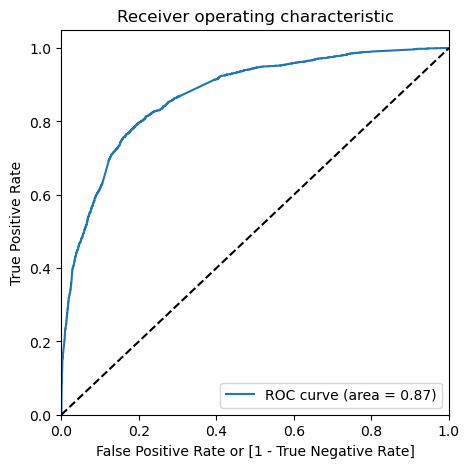

In [2060]:
# generate ROC curve
generate_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<p style="color: green"> <i> The area under the ROC curve is 0.87 which is indeed a very good score.

In [2061]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.611739          1    1    1    1    1    1    1    1   
1          0         0.223294          0    1    1    1    0    0    0    0   
2          0         0.425011          0    1    1    1    1    1    0    0   
3          0         0.223294          0    1    1    1    0    0    0    0   
4          0         0.432202          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [2062]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

In [2063]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.386711  1.000000  0.000000
0.1   0.1  0.572508  0.972720  0.320154
0.2   0.2  0.717840  0.923453  0.588190
0.3   0.3  0.783341  0.829397  0.754300
0.4   0.4  0.805228  0.765879  0.830039
0.5   0.5  0.807747  0.703176  0.873684
0.6   0.6  0.784758  0.569625  0.920411
0.7   0.7  0.769643  0.495114  0.942747
0.8   0.8  0.749961  0.400651  0.970218
0.9   0.9  0.700205  0.243485  0.988190

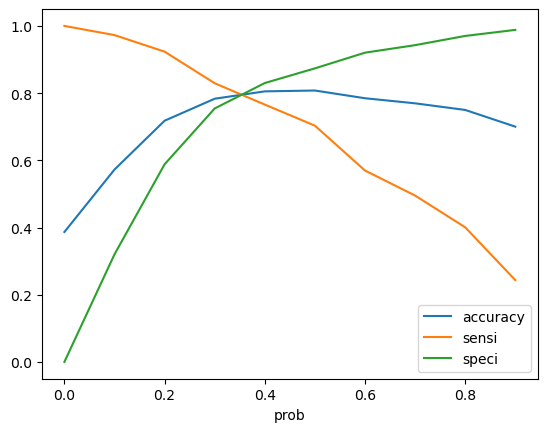

In [2064]:
# Plotting accuracy, sensitivity, and specificity at different values
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<p style="color: green"> <i>  It is clearly visible from the graph that the optimal cut off is higher than 0.35. But we are approximating the value at 0.35

In [2065]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.611739          1    1    1    1    1    1    1    1   
1          0         0.223294          0    1    1    1    0    0    0    0   
2          0         0.425011          0    1    1    1    1    1    0    0   
3          0         0.223294          0    1    1    1    0    0    0    0   
4          0         0.432202          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                0  
4    0    0    0                1

In [2066]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7967249252086286

In [2067]:
# Creating confusion matrix 
confusion_mat2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_mat2

array([[3097,  798],
       [ 493, 1963]], dtype=int64)

In [2068]:
# Substituting the value of true positive
TP = confusion_mat2[1,1]
# Substituting the value of true negatives
TN = confusion_mat2[0,0]
# Substituting the value of false positives
FP = confusion_mat2[0,1] 
# Substituting the value of false negatives
FN = confusion_mat2[1,0]

In [2069]:
# Calculating the sensitivity
TP/(TP+FN)

0.7992671009771987

In [2070]:
# Calculating the specificity
TN/(TN+FP)

0.7951219512195122

<p style="color: green"> <i> <ins>With the current cut off as 0.35</ins> :: <br>
 *** we have accuracy, sensitivity and specificity all are close to 80%.

#### <i> Step 8 : Test set - Prediction

In [2071]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [2072]:
# Substituting all the columns in the final train model
col = X_train.columns

In [2073]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
8308    1.0     0.035461                     0.416813   
7212    1.0     0.028369                     0.001320   
2085    1.0     0.000000                     0.000000   
4048    1.0     0.028369                     0.617077   
4790    1.0     0.028369                     0.005282   
...     ...          ...                          ...   
3261    1.0     0.000000                     0.000000   
8179    1.0     0.170213                     0.148768   
6236    1.0     0.000000                     0.000000   
5240    1.0     0.078014                     0.458627   
7243    1.0     0.035461                     0.499560   

      Lead Origin_lead add form  Lead Source_direct traffic  \
8308                          0                           1   
7212                          0                           0   
2085                          1                           0   
4048                          0                           1   
4790                          0                           1   
...                         ...                         ...   
3261                          0                           0   
8179                          0                           0   
6236                          0                           0   
5240                          0                           0   
7243                          0                           0   

      Lead Source_google  Lead Source_organic search  \
8308                   0                           0   
7212                   0                           1   
2085                   0                           0   
4048                   0                           0   
4790                   0                           0   
...                  ...                         ...   
3261                   0                           0   
8179                   1                           0   
6236                   0                           0   
5240                   1                           0   
7243                   0                           1   

      Lead Source_welingak website  Do Not Email_yes  \
8308                             0                 0   
7212                             0                 0   
2085                             1                 0   
4048                             0                 0   
4790                             0                 0   
...                            ...               ...   
3261                             0                 0   
8179                             0                 0   
6236                             0                 0   
5240                             0                 0   
7243                             0                 0   

      Last Activity_olark chat conversation  Last Activity_sms sent  \
8308                                      0                       0   
7212                                      0                       1   
2085                                      0                       0   
4048                                      0                       1   
4790                                      0                       0   
...                                     ...                     ...   
3261                                      1                       0   
8179                                      0                       1   
6236                                      0                       0   
5240                                      0                       1   
7243                                      0                       0   

      What is your current occupation_working professional  \
8308                                                  0      
7212                                                  1      
2085                                                  0      
4048                                                  0      
4790                                                  0

In [2074]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.342925
1          1         0.849219
2          1         0.982565
3          1         0.822258
4          0         0.071883

In [2075]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.342925                0
1             1         0.849219                1
2             1         0.982565                1
3             1         0.822258                1
4             0         0.071883                0
...         ...              ...              ...
2718          1         0.061901                0
2719          0         0.595864                1
2720          0         0.223294                0
2721          1         0.795858                1
2722          1         0.483521                1

[2723 rows x 3 columns]

In [2076]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8005875872199779

In [2077]:
# Creating confusion matrix 
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_test

array([[1394,  350],
       [ 193,  786]], dtype=int64)

In [2078]:
# Substituting the value of true positive
TP = confusion_test[1,1]
# Substituting the value of true negatives
TN = confusion_test[0,0]
# Substituting the value of false positives
FP = confusion_test[0,1] 
# Substituting the value of false negatives
FN = confusion_test[1,0]

In [2079]:
# Calculating the sensitivity
TP/(TP+FN)

0.8028600612870276

In [2080]:
# Calculating the specificity
TN/(TN+FP)

0.7993119266055045

<p style="color: green"> <i> <ins>With the current cut off as 0.35 on Test data set</ins> :: <br>
 *** we have accuracy, sensitivity and specificity all are close to 80%.

#### <i> Step 9 : Precision-Recall

In [2081]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3403,  492],
       [ 729, 1727]], dtype=int64)

In [2082]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7782785038305543

In [2083]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7031758957654723

<p style="color: green"> <i> <ins>With the current cut off as 0.35 on Test data set</ins> :: <br>
 *** we have Precision around 78% and Recall aroung 70%

#### <i> Step 9.1 : Precision and recall tradeoff

In [2084]:
from sklearn.metrics import precision_recall_curve

In [2085]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [2086]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

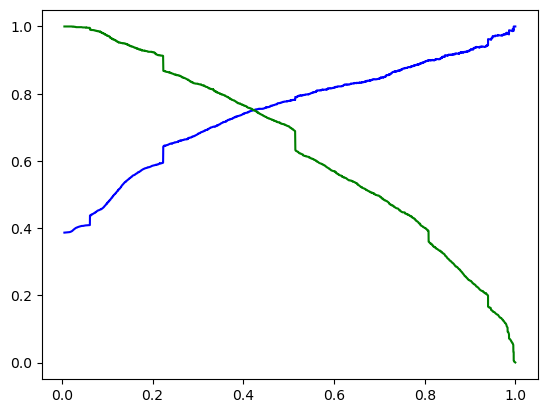

In [2087]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

<p style="color: green"> <i> <b> Above graph is clearly indicating the cut-off higher than 0.4 and ~0.41

In [2088]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.611739          1    1    1    1    1    1    1    1   
1          0         0.223294          0    1    1    1    0    0    0    0   
2          0         0.425011          0    1    1    1    1    1    0    0   
3          0         0.223294          0    1    1    1    0    0    0    0   
4          0         0.432202          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                0  
4    0    0    0                1

In [2089]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8060148008187688

In [2090]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3256,  639],
       [ 593, 1863]], dtype=int64)

In [2091]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [2092]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7446043165467626

In [2093]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7585504885993485

<p style="color: green"> <i> <b> With cut off of 0.41 
<p style="color: blue"> Precision = ~74%
<p style="color: blue"> Recall = ~76%

#### <i> Step 9.1 : Prediction on Test data set

In [2094]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.342925
1          1         0.849219
2          1         0.982565
3          1         0.822258
4          0         0.071883

In [2095]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.342925                0
1             1         0.849219                1
2             1         0.982565                1
3             1         0.822258                1
4             0         0.071883                0
...         ...              ...              ...
2718          1         0.061901                0
2719          0         0.595864                1
2720          0         0.223294                0
2721          1         0.795858                1
2722          1         0.483521                1

[2723 rows x 3 columns]

In [2096]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.808666911494675

In [2097]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1465,  279],
       [ 242,  737]], dtype=int64)

In [2098]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [2099]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7253937007874016

In [2100]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7528089887640449

<p style="color: green"> <i> <b> With cut off of 0.41 on Test set <br>
Precision = ~ 73% <br>
Recall = ~ 75%

<p style="color: green"><i><b> ******** Final Takeaways ******** </b>
<p style="color: yellow"> <i> After analysing several models with the help of logistic regression that the variables which observed most in the potential clients are as follows (in descending order ) :
<p style="color: brown"><br>1. The total time spend on the Website
    <br> 2. Total number of visits
    <br class="tab2"> 3. Lead source was :
        <br> i. Google
        <br> ii.Direct Traffic
        <br> iii. Organic Search
        <br> iv. Welingk website
    <br> 4. Last activity was on :
        <br> i. SMS
        <br> ii. Olrak chat conversation
    <br> 5. When the lead origin is Lead add format.
    <br> 6. When their current occupatio is as a working professional
    <br> Keeping above pointers in mind, the X Education can expand as they have a high chance to convert almost all the potential leads to enroll.